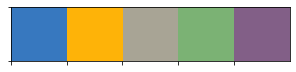

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
import seaborn as sns
#plt.rcParams['axes.facecolor']='lightsteelblue'
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] 
#plt.rc('lines',linewidth=1,linestyle='solid')
#plt.rc('font',size=18)
#plt.rc('grid',color='w')
#mpl.rcParams['axes.grid'] = True
#mpl.rcParams["axes.edgecolor"] = 'w'
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
sns.set(color_codes=True)
start = datetime.datetime(2015,1,1)
finish = datetime.datetime.now()

In [2]:
#Einzelwert
apple       = web.DataReader('AAPL','yahoo',start,finish)
wirecard    = web.DataReader('WDI.DE','yahoo',start,finish)
amzn        = web.DataReader('AMZN','yahoo',start,finish)
ibm         = web.DataReader('IBM','yahoo',start,finish)
tmv         = web.DataReader('TMV.DE','yahoo',start,finish)
cisco       = web.DataReader('CSCO','yahoo',start,finish)
rwe         = web.DataReader('RWE.DE','yahoo',start,finish)
applied_mat = web.DataReader('AMAT','yahoo',start,finish)
AMD         = web.DataReader('AMD','yahoo',start,finish)
hapaq       = web.DataReader('HLAG.DE','yahoo',start,finish)
toyota      = web.DataReader('TM','yahoo',start,finish)
eckert      = web.DataReader('EUZ.DE','yahoo',start,finish)
umicore     = web.DataReader('UMI.BR','yahoo',start,finish)


In [3]:
# Indices
dax = web.DataReader('^GDAXI','yahoo',start,finish)
volatility_index = web.DataReader('^VIX','yahoo',start,finish)
banken_index = web.DataReader('^STOXX','yahoo',start,finish)
dow_jones_utility = web.DataReader('^DJU','yahoo',start,finish)
nasdaq = web.DataReader('^IXIC','yahoo',start,finish)

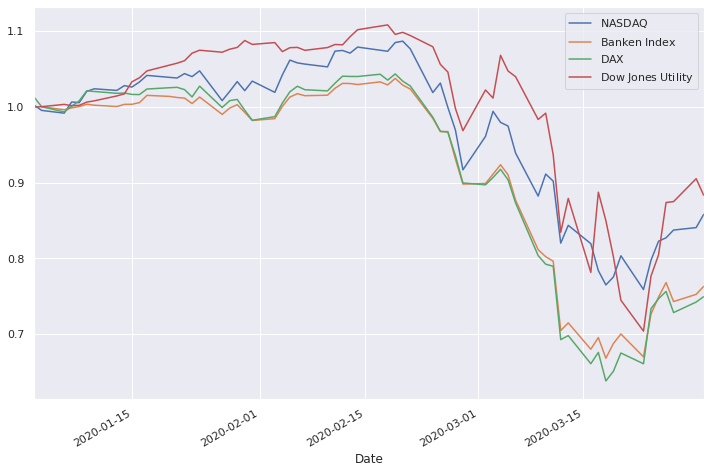

In [4]:
nasdaq['norm']=nasdaq['Open']['2020-01-01':]/nasdaq['Close']['2020-01-03']
banken_index['norm']=banken_index['Close']['2020-01-01':]/banken_index['Close']['2020-01-03']
dax['norm']=dax['Close']['2020-01-01':]/dax['Close']['2020-01-03']
dow_jones_utility['norm']=dow_jones_utility['Close']['2020-01-01':]/dow_jones_utility['Close']['2020-01-03']
nasdaq['norm']['2020-01-01':].plot(label='$\mathrm{NASDAQ}$',figsize=(12,8))
banken_index['norm']['2020-01-01':].plot(label='$\mathrm{Banken\; Index}$',figsize=(12,8))
dax['norm']['2020-01-01':].plot(label='$\mathrm{DAX}$',figsize=(12,8))
dow_jones_utility['norm']['2020-01-01':].plot(label='$\mathrm{Dow\; Jones\; Utility}$',figsize=(12,8))

plt.legend();

# relative Stärke

In [5]:
rel_st =[]
for stock_df in (apple,wirecard,amzn,ibm,tmv ,cisco,rwe,applied_mat,AMD,hapaq,toyota,eckert,umicore):
    stock_df['relative Stärke'] = stock_df['Close'].rolling(456).mean()
    stock_df['relative Stärke'] = stock_df['Close']*100/stock_df['relative Stärke']
    rel_st =  np.append(rel_st,stock_df['relative Stärke'][-1])

In [6]:
all_pos_rel = [apple['relative Stärke'],
                wirecard['relative Stärke'],
                amzn['relative Stärke'],
                ibm['relative Stärke'],
                cisco['relative Stärke'],
                rwe['relative Stärke'],
                applied_mat['relative Stärke'],
                AMD['relative Stärke'],
                toyota['relative Stärke'],
                eckert['relative Stärke'],
                umicore['relative Stärke']]
relative_staerke = pd.concat(all_pos_rel,axis = 1)
relative_staerke.columns = ['Apple',
                         'Wirecard',
                         'Amazon',
                         'IBM',
                         'Cisco',
                         'RWE',
                         'Applied Materials',
                         'Advanced Micro',
                         'Toyota',
                         'Eckert und Ziegler',
                         'Umicore']
relative_staerke.tail()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore
Date,,,,,,,,,,,
2020-03-25,113.301398,74.958319,104.820871,77.529096,78.465397,99.740058,97.322412,151.401251,94.929561,122.469350,88.282616
2020-03-26,119.183315,72.848002,108.653800,82.725558,84.538426,101.606712,107.063914,160.746887,98.895498,139.098783,85.324716
2020-03-27,114.186003,71.570769,105.549934,79.209564,80.889819,98.008317,98.069898,157.263156,99.610630,129.609453,81.869397
2020-03-30,117.372471,71.816537,109.061147,82.844668,84.030520,97.843666,102.993666,161.200488,98.047695,135.448108,80.236242
2020-03-31,120.084401,74.635249,110.059373,82.909891,84.012104,101.440307,102.263423,161.763072,94.870165,136.103881,84.135973


# Normalize

In [7]:
for stock_df in (apple,wirecard,amzn,ibm,cisco,rwe,applied_mat,AMD,toyota,eckert,umicore):
    stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']
    
    

# Allocation

In [8]:
for stock_df , allo in list(zip((apple,
                                 wirecard,
                                 amzn,
                                 ibm,
                                 cisco,
                                 rwe,
                                 applied_mat,
                                 AMD,
                                 toyota,
                                 eckert,
                                 umicore),
                                [.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07])):
    stock_df['Allocation'] = stock_df['Normed Return']*allo


# Value

In [9]:
for stock_df in (apple,wirecard,amzn,ibm,cisco,rwe,applied_mat,AMD,toyota,eckert,umicore):
    stock_df['Position Values'] = stock_df['Allocation']*25000

In [10]:
all_pos_vals = [apple['Position Values'],
                wirecard['Position Values'],
                amzn['Position Values'],
                ibm['Position Values'],
                cisco['Position Values'],
                rwe['Position Values'],
                applied_mat['Position Values'],
                AMD['Position Values'],
                toyota['Position Values'],
                eckert['Position Values'],
                umicore['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis = 1)

In [11]:
portfolio_val.columns = ['Apple',
                         'Wirecard',
                         'Amazon',
                         'IBM',
                         'Cisco',
                         'RWE',
                         'Applied Materials',
                         'Advanced Micro',
                         'Toyota',
                         'Eckert und Ziegler',
                         'Umicore']

In [12]:

portfolio_val['Total Pos Sum'] = portfolio_val.sum(axis=1)
portfolio_dropna=portfolio_val.dropna()

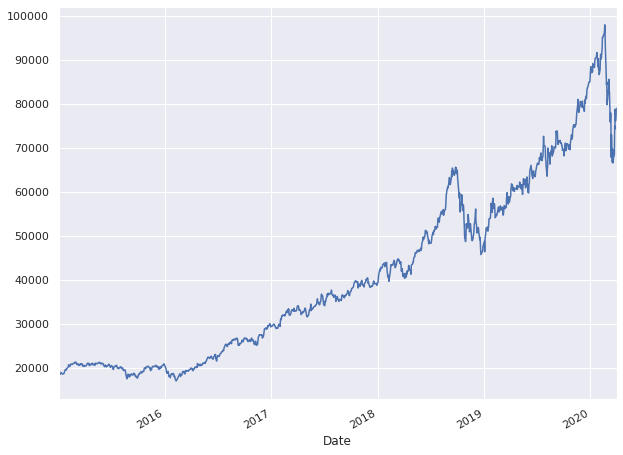

In [13]:
portfolio_dropna['Total Pos Sum'][::].plot(figsize=(10,8))


In [14]:
portfolio_val['Total Pos Sum'].argmin()

/home/dominik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2015-05-25 00:00:00')

In [15]:
print(portfolio_val['Total Pos Sum']['2015-05-25'])

2406.1831101387447


In [16]:
wirecard['Normed Return']

Date
2015-01-02    1.000000
2015-01-05    0.992919
2015-01-06    0.982088
2015-01-07    0.995140
2015-01-08    1.037212
                ...   
2020-03-25    2.901972
2020-03-26    2.818662
2020-03-27    2.767565
2020-03-30    2.775340
2020-03-31    2.882533
Name: Normed Return, Length: 1331, dtype: float64

In [17]:
portfolio_val.dropna()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore,Total Pos Sum
Date,,,,,,,,,,,,
2015-01-02,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,19250.000000
2015-01-05,1700.699688,1737.607742,1714.094785,1722.463869,1715.139370,1670.609362,1693.910308,1743.445699,1717.971735,1754.154584,1728.064820,18898.161962
2015-01-06,1700.859788,1718.654702,1674.956351,1685.317271,1714.505528,1656.298677,1630.108233,1723.782797,1700.286468,1560.274305,1721.377262,18486.421382
2015-01-07,1724.709566,1741.495455,1692.710496,1674.302786,1730.351235,1642.669342,1645.532865,1691.011138,1743.037320,1587.971588,1708.804723,18582.596513
2015-01-08,1790.976819,1815.120810,1704.281744,1710.693576,1743.661693,1678.105510,1698.117001,1710.674040,1776.597489,1606.436268,1739.834986,18974.499936
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,3929.936891,5078.450667,10696.940418,1143.018019,2387.631124,1602.122271,3136.117871,29251.872523,1689.006960,11743.603036,3627.331356,74286.031137
2020-03-26,4136.741944,4932.657825,11092.012203,1219.039256,2572.075394,1632.788080,3449.519411,31132.957912,1759.329966,13368.504688,3502.140067,78797.766746
2020-03-27,3965.471530,4843.238393,10777.826642,1166.558686,2460.521476,1575.545210,3158.553748,30529.962875,1771.862811,12482.194440,3356.618955,76088.354767


In [18]:
stocks = pd.concat([apple['Close'],
                    wirecard['Close'],
                    amzn['Close'],
                    ibm['Close'],
                    cisco['Close'],
                    rwe['Close'],
                    applied_mat['Close'],
                    AMD['Close'],
                    toyota['Close'],
                    eckert['Close'],
                    umicore['Close'],
                    tmv['Close'],
                    hapaq['Close']],axis=1)
stocks.columns = ['Apple',
                  'Wirecard',
                  'Amazon',
                  'IBM',
                  'Cisco',
                  'RWE',
                  'Applied Materials',
                  'Advanced Micro',
                  'Toyota',
                  'Eckert und Ziegler',
                  'Umicore',
                  'Teamviewer',
                  'Hapaq Loyd']

In [19]:
stocks.pct_change(1).mean()

Apple                 0.000796
Wirecard              0.001180
Amazon                0.001549
IBM                  -0.000154
Cisco                 0.000411
RWE                   0.000220
Applied Materials     0.000737
Advanced Micro        0.002925
Toyota                0.000050
Eckert und Ziegler    0.001771
Umicore               0.000697
Teamviewer            0.003532
Hapaq Loyd            0.001429
dtype: float64

In [20]:
stocks.pct_change(1).corr()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore,Teamviewer,Hapaq Loyd
Apple,1.000000,0.204511,0.522360,0.513466,0.609170,0.180079,0.587727,0.348279,0.475615,0.130039,0.284038,0.265672,0.171838
Wirecard,0.204511,1.000000,0.201841,0.193373,0.223140,0.225999,0.162598,0.130227,0.201598,0.239707,0.271384,0.281948,0.223009
Amazon,0.522360,0.201841,1.000000,0.404295,0.483883,0.179823,0.424975,0.310149,0.382020,0.126923,0.251053,0.236563,0.132085
IBM,0.513466,0.193373,0.404295,1.000000,0.588707,0.284710,0.504803,0.314792,0.497346,0.166560,0.231056,0.226833,0.165748
Cisco,0.609170,0.223140,0.483883,0.588707,1.000000,0.216977,0.531857,0.333307,0.485844,0.144724,0.295140,0.273871,0.137259
RWE,0.180079,0.225999,0.179823,0.284710,0.216977,1.000000,0.227695,0.162421,0.293424,0.157055,0.239407,0.334074,0.152331
Applied Materials,0.587727,0.162598,0.424975,0.504803,0.531857,0.227695,1.000000,0.423200,0.463074,0.190255,0.240241,0.204340,0.155226
Advanced Micro,0.348279,0.130227,0.310149,0.314792,0.333307,0.162421,0.423200,1.000000,0.295006,0.160413,0.212860,0.242671,0.122946
Toyota,0.475615,0.201598,0.382020,0.497346,0.485844,0.293424,0.463074,0.295006,1.000000,0.131500,0.283687,0.158083,0.149169
Eckert und Ziegler,0.130039,0.239707,0.126923,0.166560,0.144724,0.157055,0.190255,0.160413,0.131500,1.000000,0.148059,0.228468,0.109900


In [21]:
log_return = np.log(stocks/stocks.shift(1))

In [22]:
#log_return.hist(bins=100,figsize=(30,16))
#plt.tight_layout

In [23]:
from pandas.plotting import scatter_matrix
#scatter_matrix(stocks,figsize=(30,30),alpha=0.2,hist_kwds={'bins':50});

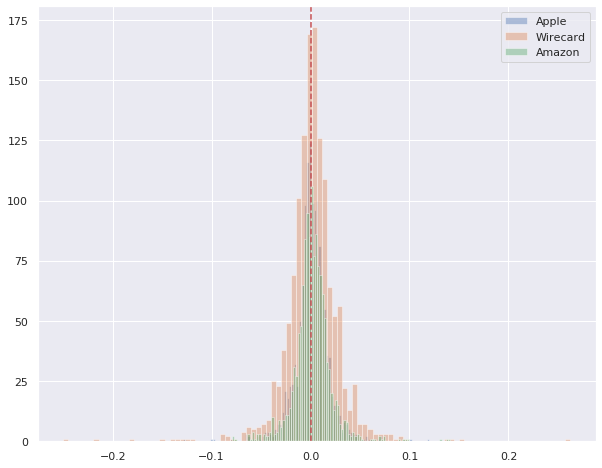

In [24]:


apple['Close'].pct_change(1).hist(bins=100,label='Apple',figsize=(10,8),alpha=0.4)
wirecard['Close'].pct_change(1).hist(bins=100,label='Wirecard',figsize=(10,8),alpha=0.4)
amzn['Close'].pct_change(1).hist(bins=100,label='Amazon',figsize=(10,8),alpha=0.4)
plt.axvline(0.0, c='r', ls='--')
plt.legend()

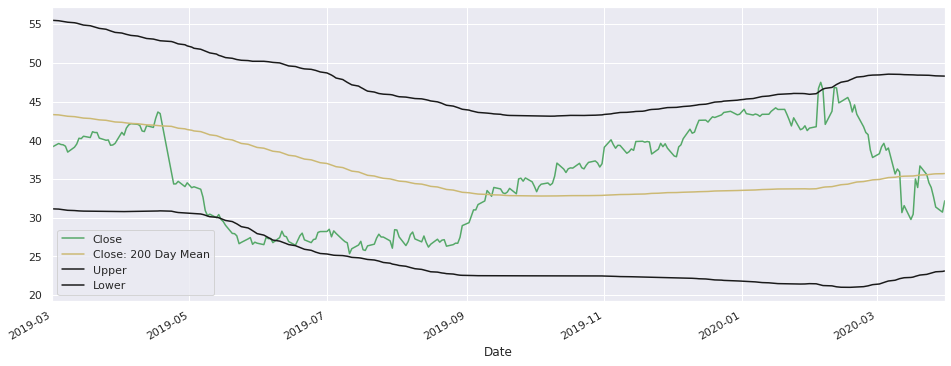

In [25]:
# Close 20 MA
umicore['Close: 200 Day Mean'] = umicore['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
umicore['Upper'] = umicore['Close: 200 Day Mean']+2*(umicore['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
umicore['Lower'] = umicore['Close: 200 Day Mean']-2*(umicore['Close'].rolling(200).std())
# Close
umicore[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])
